In [41]:
#import needed libraries to start


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from yahoo_fin import stock_info as si
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

%matplotlib inline

from IPython.display import display

#remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas_datareader.data as web


In [42]:
#get the stock data for stock symbol entry using pandas_datareader

stock_symbol = input("Enter a stock symbol (for example, AAPL): ")
data = web.get_data_yahoo(stock_symbol, '1/1/2016', '2/6/2020',)
data.reset_index(inplace=True,drop=False)

Enter a stock symbol (for example, AAPL): AAPL


In [43]:
data.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655
1,2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675
2,2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387
3,2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868
4,2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.606438
5,2016-01-11,99.059998,97.339996,98.970001,98.529999,49739400.0,92.073563
6,2016-01-12,100.690002,98.839996,100.550003,99.959999,49154200.0,93.409874
7,2016-01-13,101.190002,97.300003,100.320000,97.389999,62439600.0,91.008270
8,2016-01-14,100.480003,95.739998,97.959999,99.519997,63170100.0,92.998695
9,2016-01-15,97.709999,95.360001,96.199997,97.129997,79833900.0,90.765305


In [44]:
data.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close
1021,2020-01-24,323.329987,317.519989,320.250000,318.309998,36634400.0,318.309998
1022,2020-01-27,311.769989,304.880005,310.059998,308.950012,40485000.0,308.950012
1023,2020-01-28,318.399994,312.190002,312.600006,317.690002,40558500.0,317.690002
1024,2020-01-29,327.850006,321.380005,324.450012,324.339996,54057300.0,324.339996
1025,2020-01-30,324.089996,318.750000,320.540009,323.869995,31685800.0,323.869995
1026,2020-01-31,322.679993,308.290009,320.929993,309.510010,49897100.0,309.510010
1027,2020-02-03,313.489990,302.220001,304.299988,308.660004,43496400.0,308.660004
1028,2020-02-04,319.640015,313.630005,315.309998,318.850006,34154100.0,318.850006
1029,2020-02-05,324.760010,318.950012,323.519989,321.450012,29706700.0,321.450012
1030,2020-02-06,325.220001,320.260010,322.570007,325.209991,26227500.0,325.209991


In [45]:
#extracting the year, month, and the day from the column 'Date'
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Day'] = pd.DatetimeIndex(data['Date']).day


In [46]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day
0,2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655,2016,1,4
1,2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675,2016,1,5
2,2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387,2016,1,6
3,2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868,2016,1,7
4,2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.606438,2016,1,8


In [47]:
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day
1026,2020-01-31,322.679993,308.290009,320.929993,309.510010,49897100.0,309.510010,2020,1,31
1027,2020-02-03,313.489990,302.220001,304.299988,308.660004,43496400.0,308.660004,2020,2,3
1028,2020-02-04,319.640015,313.630005,315.309998,318.850006,34154100.0,318.850006,2020,2,4
1029,2020-02-05,324.760010,318.950012,323.519989,321.450012,29706700.0,321.450012,2020,2,5
1030,2020-02-06,325.220001,320.260010,322.570007,325.209991,26227500.0,325.209991,2020,2,6


The skewness of Close on training data is: 0.6396632201078811


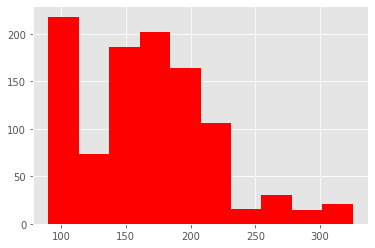

In [48]:
#check the skewness of Close
print ("The skewness of Close on training data is:", data['Close'].skew())
plt.hist(data['Close'], color='red')
plt.show()

The skewness of the log of Close on the data is: -0.0629673459594843


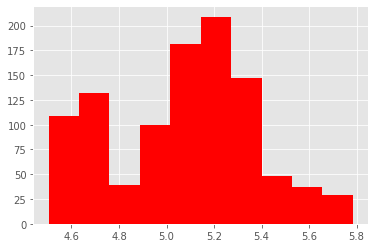

In [49]:
#taking log of Close to reduce the skewness
target = np.log(data['Close'])
print ("The skewness of the log of Close on the data is:", target.skew())
plt.hist(target, color='red')
plt.show()

In [50]:
#check for missing values
null_data = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))[:50]

null_data.columns = ['Null Count']
null_data.index.name = 'Feature'
null_data

,Null Count
Feature,
Day,0
Month,0
Year,0
Adj Close,0
Volume,0
Close,0
Open,0
Low,0
High,0


In [51]:
#create a DF for log transformation of Close
data['logClose']=np.log(data['Close']+1)

data.head()
data.shape

(1031, 11)

In [52]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day,logClose
0,2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655,2016,1,4,4.666736
1,2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675,2016,1,5,4.641599
2,2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387,2016,1,6,4.622027
3,2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868,2016,1,7,4.579339
4,2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.606438,2016,1,8,4.584559


In [53]:
x = data.drop(columns = ['Date', 'logClose', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'])
y = data['logClose']

display(x.head())
display(y.head())

,Year,Month,Day
0,2016,1,4
1,2016,1,5
2,2016,1,6
3,2016,1,7
4,2016,1,8


0    4.666736
1    4.641599
2    4.622027
3    4.579339
4    4.584559
Name: logClose, dtype: float64

In [54]:
#split the given train dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.35, shuffle=False)
x_train.head()

,Year,Month,Day
0,2016,1,4
1,2016,1,5
2,2016,1,6
3,2016,1,7
4,2016,1,8


In [55]:
#import needed libraries
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

#create a function to calculate the mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def printScore(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
    
    print('Evaluation Metrics')
    print('MAE         : %0.4f ' % mae)
    print('MAPE        : %0.4f ' % mape)
    print('RMSLE       : %0.4f ' % rmsle)   

!pip install lightgbm

In [56]:
#Linear Regression

lr = LinearRegression(n_jobs = -1)

lr.fit(x_train, y_train)

y_pred = lr.predict(x_train)

print('-------Linear Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = lr.predict(x_test)

print('')
print('-------Linear Regression(on Test Set)------')
printScore(y_test, y_pred)

-------Linear Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0475 
MAPE        : 0.9702 
RMSLE       : 0.0097 

-------Linear Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.2135 
MAPE        : 4.0566 
RMSLE       : 0.0384 


In [57]:
#LR_Lasso
model_lasso = Lasso(random_state=42,alpha=0.00035)
lr_lasso = make_pipeline(RobustScaler(), model_lasso)
lr_lasso.fit(x_train,y_train)



y_pred = lr_lasso.predict(x_train)

print('-------LR_lasso Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = lr_lasso.predict(x_test)

print('')
print('-------LR_lasso Regression(on Test Set)------')
printScore(y_test, y_pred)

-------LR_lasso Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0474 
MAPE        : 0.9698 
RMSLE       : 0.0097 

-------LR_lasso Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.2122 
MAPE        : 4.0320 
RMSLE       : 0.0382 


In [58]:
#LGBM Regression
lgb = lgb.LGBMRegressor()
lgb.fit(x_train, y_train)

y_pred = lgb.predict(x_train)

print('-------LGBM Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = lgb.predict(x_test)

print('')
print('-------LGBM Regression(on Test Set)------')
printScore(y_test, y_pred)

-------LGBM Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0107 
MAPE        : 0.2179 
RMSLE       : 0.0025 

-------LGBM Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.1367 
MAPE        : 2.5022 
RMSLE       : 0.0317 


In [59]:
#RandomForest Regression
forest_reg = RandomForestRegressor(n_estimators=1, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
forest_reg.fit(x_train, y_train)

y_pred = forest_reg.predict(x_train)

print('-------RandomForest Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = forest_reg.predict(x_test)

print('')
print('-------RandomForest Regression(on Test Set)------')
printScore(y_test, y_pred)

-------RandomForest Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0119 
MAPE        : 0.2389 
RMSLE       : 0.0064 

-------RandomForest Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.1485 
MAPE        : 2.7231 
RMSLE       : 0.0338 


In [60]:
#GBoost Regression
model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.0156,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42)

model_GBoost.fit(x_train, y_train)

y_pred = model_GBoost.predict(x_train)

print('-------GradientBoosting Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = model_GBoost.predict(x_test)

print('')
print('------- GradientBoosting Regression(on Test Set)------')
printScore(y_test, y_pred)

-------GradientBoosting Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0102 
MAPE        : 0.2073 
RMSLE       : 0.0025 

------- GradientBoosting Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.1479 
MAPE        : 2.7072 
RMSLE       : 0.0326 


In [61]:
#XGBoost Regression
XGB_regr = xgb.XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

XGB_regr.fit(x_train, y_train)

y_pred = XGB_regr.predict(x_train)

print('-------XGB Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = XGB_regr.predict(x_test)

print('')
print('------- XGB Regression(on Test Set)------')
printScore(y_test, y_pred)

[18:19:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-------XGB Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0145 
MAPE        : 0.2956 
RMSLE       : 0.0032 

------- XGB Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.1410 
MAPE        : 2.5875 
RMSLE       : 0.0319 


In [62]:
#making stock price prediction for the future
import datetime
#a function to get user's input for the date for the stock price prediction
def ObtainDate():
    isValid=False
    while not isValid:
        userIn = input("Enter the target date for the stock price prediction (dd/mm/yyyy)(for example: 01/02/2025) ")
        try: # strptime throws an exception if the input doesn't match the pattern
            d = datetime.datetime.strptime(userIn, "%d/%m/%Y")
            isValid=True
        except:
            print ("Doh, try again!\n")
    return d

a = ObtainDate()

targetDate = pd.DataFrame({'Year': [a.year], 'Month': [a.month], 'Day': [a.day]})

def futurePrice(model, td):
    futurePrice = np.exp(model.predict(td))-1
    return futurePrice

#using the best models to predict

print ('Using model of LR, the future stock price is:', futurePrice(lr, targetDate))
print ('Using model of LR_Lasso, the future stock price is:', futurePrice(lr_lasso, targetDate))
print ('Using model of XBG, the future stock price is:', futurePrice(XGB_regr , targetDate))
print ('Using model of RFR, the future stock price is:', futurePrice(forest_reg , targetDate))
print ('Using model of LGBM, the future stock price is:', futurePrice(lgb, targetDate))
print ('Using model of GB, the future stock price is:', futurePrice(model_GBoost, targetDate))


Enter the target date for the stock price prediction (dd/mm/yyyy)(for example: 01/02/2025) 01/02/2025
Using model of LR, the future stock price is: [1493.75415048]
Using model of LR_Lasso, the future stock price is: [1487.18289386]
Using model of XBG, the future stock price is: [163.73996]
Using model of RFR, the future stock price is: [160.5]
Using model of LGBM, the future stock price is: [162.0907721]
Using model of GB, the future stock price is: [164.09578]


## Since stock prices tends to increase over time, it suggests, LR and LR_lasso are the final best models to predict the stock prices.



In [63]:
#future returns on investment in the chosen stock from today's purchase

def whole_data_training (model, x, y):
        model.fit(x,y)

whole_data_training(lr, x, y)
whole_data_training(lr_lasso, x, y)

#livePrice = si.get_live_price("aapl")
livePrice = float(input("Enter the current price of the stock:) "))

returns = ((futurePrice(lr, targetDate)+futurePrice(lr_lasso , targetDate))/2 - livePrice)/livePrice

print ('If invested today, the future returns on the chosen stock to the target date is: ', "%.2f" %  (float(returns)*100), '%!')

Enter the current price of the stock:) 100
If invested today, the future returns on the chosen stock to the target date is:  729.78 %!


# NLP

In this part, we pre-processed the content of description of the companies in a seperate dataset that includes the infos of all the companies in SP500 IT sector, for the preparation for the recommendtion system training later on.


In [70]:
import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance

In [94]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# Libraries for text preprocessing
import re # remove punctuations, special characters and digits
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
### Please download these pakages for running this code:
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [95]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [114]:
data = pd.read_csv('SP500IT.csv')
data.head()

,ID,Symbol,Name,Sector,Industry,Full Time Employees,CEO,Address,Description
0,1,AAPL,Apple Inc,Technology,Consumer Electronics,"137,000",Timothy D. Cook,"One Apple Park Way\nCupertino, CA 95014\nUnite...","Apple Inc. designs, manufactures, and markets ..."
1,2,ACN,Accenture Plc,Technology,Information Technology Services,492000,Julie T. Spellman Sweet,1 Grand Canal Square\nGrand Canal Harbour\nDub...,"Accenture plc provides consulting, technology,..."
2,3,ADBE,Adobe Systems Inc,Technology,Software - Application,21357,Shantanu Narayen,"345 Park Avenue\nSan Jose, CA 95110\nUnited St...",Adobe Inc. operates as a diversified software ...
3,4,ADI,Analog Devices,Technology,Semiconductors,"15,800",Vincent T. Roche,"One Technology Way\nPO Box 9106\nNorwood, MA 0...","Analog Devices, Inc. designs, manufactures, an..."
4,5,ADP,Automatic Data Procs,Industrials,Business Services,"58,000",Carlos A. Rodriguez,"One ADP Boulevard\nRoseland, NJ 07068\nUnited ...","Automatic Data Processing, Inc. provides cloud..."


In [115]:
data.set_index('ID',inplace= True)
data.head()

,Symbol,Name,Sector,Industry,Full Time Employees,CEO,Address,Description
ID,,,,,,,,
1,AAPL,Apple Inc,Technology,Consumer Electronics,"137,000",Timothy D. Cook,"One Apple Park Way\nCupertino, CA 95014\nUnite...","Apple Inc. designs, manufactures, and markets ..."
2,ACN,Accenture Plc,Technology,Information Technology Services,492000,Julie T. Spellman Sweet,1 Grand Canal Square\nGrand Canal Harbour\nDub...,"Accenture plc provides consulting, technology,..."
3,ADBE,Adobe Systems Inc,Technology,Software - Application,21357,Shantanu Narayen,"345 Park Avenue\nSan Jose, CA 95110\nUnited St...",Adobe Inc. operates as a diversified software ...
4,ADI,Analog Devices,Technology,Semiconductors,"15,800",Vincent T. Roche,"One Technology Way\nPO Box 9106\nNorwood, MA 0...","Analog Devices, Inc. designs, manufactures, an..."
5,ADP,Automatic Data Procs,Industrials,Business Services,"58,000",Carlos A. Rodriguez,"One ADP Boulevard\nRoseland, NJ 07068\nUnited ...","Automatic Data Processing, Inc. provides cloud..."


# Only the information in description will be cleaned and employed

In [116]:
data[['Symbol','Name','Description']].head()

,Symbol,Name,Description
ID,,,
1,AAPL,Apple Inc,"Apple Inc. designs, manufactures, and markets ..."
2,ACN,Accenture Plc,"Accenture plc provides consulting, technology,..."
3,ADBE,Adobe Systems Inc,Adobe Inc. operates as a diversified software ...
4,ADI,Analog Devices,"Analog Devices, Inc. designs, manufactures, an..."
5,ADP,Automatic Data Procs,"Automatic Data Processing, Inc. provides cloud..."


In [117]:
dataset_Org = pd.DataFrame(data)

In [118]:
stop_words=set(stopwords.words("english"))

In [119]:
cust_input = "I want to have a good apple stock"

In [120]:
corpus_input= []
#Remove punctuations
input_text = re.sub('[^a-zA-Z,]', ' ', cust_input)
print(input_text)
#Convert to lowercase
input_text = input_text.lower()
    
#remove tags
input_text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",input_text)

# remove special characters and digits
input_text=re.sub("(\\d|\\W)+"," ",input_text)
    
##Convert to list from string
input_text = input_text.split()
print(input_text)

I want to have a good apple stock
['i', 'want', 'to', 'have', 'a', 'good', 'apple', 'stock']


In [121]:
lem = WordNetLemmatizer()
input_text = [lem.lemmatize(word) for word in input_text if not word in  stop_words] 
input_text = " ".join(input_text)

corpus_input.append(str(input_text))
print(input_text)
corpus_input

cust_input_tokenized = nltk.word_tokenize(input_text) #tokenize customer input after preprocessed
input_text=cust_input_tokenized

want good apple stock


In [122]:
BoWA = cust_input_tokenized
BoWA

['want', 'good', 'apple', 'stock']

In [124]:
corpus= []
for i in range(0, len(dataset['Description'])):
    
    #Remove punctuations
    text = re.sub('[^a-zA-Z,]', ' ', str (dataset['Description'][i]))
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append((text))

In [125]:
dataset['Processed'] = corpus

### All punctuations, special characters, tags are removed and uppercase letters has been standardized to lowercase. Therefore, each stock company's desciption is standardized as a group of lowercased words seperated by a single space so the system can process easily later.

In [126]:
dataset[['Description','Processed']].head()

,Description,Processed
0,"Apple Inc. designs, manufactures, and markets ...",apple inc design manufacture market smartphone...
1,"Accenture plc provides consulting, technology,...",accenture plc provides consulting technology o...
2,Adobe Inc. operates as a diversified software ...,adobe inc operates diversified software compan...
3,"Analog Devices, Inc. designs, manufactures, an...",analog device inc design manufacture market in...
4,"Automatic Data Processing, Inc. provides cloud...",automatic data processing inc provides cloud b...


## The "Proccessed" column will be converted into bag of words (the "BoWB" column) which is a vector of the words as elements  for later algorithm implementation

In [127]:
BoWB =[]
for i in range(0, len(dataset['Processed'])):
    #Remove punctuations
    text_BoW = re.sub('[^a-zA-Z]', ' ', dataset['Processed'][i])
    text_BoW = text_BoW.split()
    BoWB.append((text_BoW))

In [128]:
dataset['BoWB'] = BoWB
dataset[['Description','Processed','BoWB']].head()

,Description,Processed,BoWB
0,"Apple Inc. designs, manufactures, and markets ...",apple inc design manufacture market smartphone...,"[apple, inc, design, manufacture, market, smar..."
1,"Accenture plc provides consulting, technology,...",accenture plc provides consulting technology o...,"[accenture, plc, provides, consulting, technol..."
2,Adobe Inc. operates as a diversified software ...,adobe inc operates diversified software compan...,"[adobe, inc, operates, diversified, software, ..."
3,"Analog Devices, Inc. designs, manufactures, an...",analog device inc design manufacture market in...,"[analog, device, inc, design, manufacture, mar..."
4,"Automatic Data Processing, Inc. provides cloud...",automatic data processing inc provides cloud b...,"[automatic, data, processing, inc, provides, c..."


In [129]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,1))
X=cv.fit_transform(dataset['Processed'])

## We turned these BoWB into vector for later use of recommendation part

In [130]:
dataset['dicB'] = X
dataset[['Description','Processed','BoWB','dicB']].head()

,Description,Processed,BoWB,dicB
0,"Apple Inc. designs, manufactures, and markets ...",apple inc design manufacture market smartphone...,"[apple, inc, design, manufacture, market, smar...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."
1,"Accenture plc provides consulting, technology,...",accenture plc provides consulting technology o...,"[accenture, plc, provides, consulting, technol...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."
2,Adobe Inc. operates as a diversified software ...,adobe inc operates diversified software compan...,"[adobe, inc, operates, diversified, software, ...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."
3,"Analog Devices, Inc. designs, manufactures, an...",analog device inc design manufacture market in...,"[analog, device, inc, design, manufacture, mar...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."
4,"Automatic Data Processing, Inc. provides cloud...",automatic data processing inc provides cloud b...,"[automatic, data, processing, inc, provides, c...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."
